In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn import metrics

In [24]:
dataset = pd.read_csv('/content/Boston-house-price-data.csv')

In [25]:
dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [26]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [27]:
dataset.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273.0,21.0,396.90,7.88,11.9


In [28]:
dataset.shape

(506, 14)

In [29]:
dataset.isnull()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [30]:
dataset.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


If we get any null value then we can simply replace that null value with the help of the mean or the median of the dataset.

In [31]:
correlation = dataset.corr()

<Axes: >

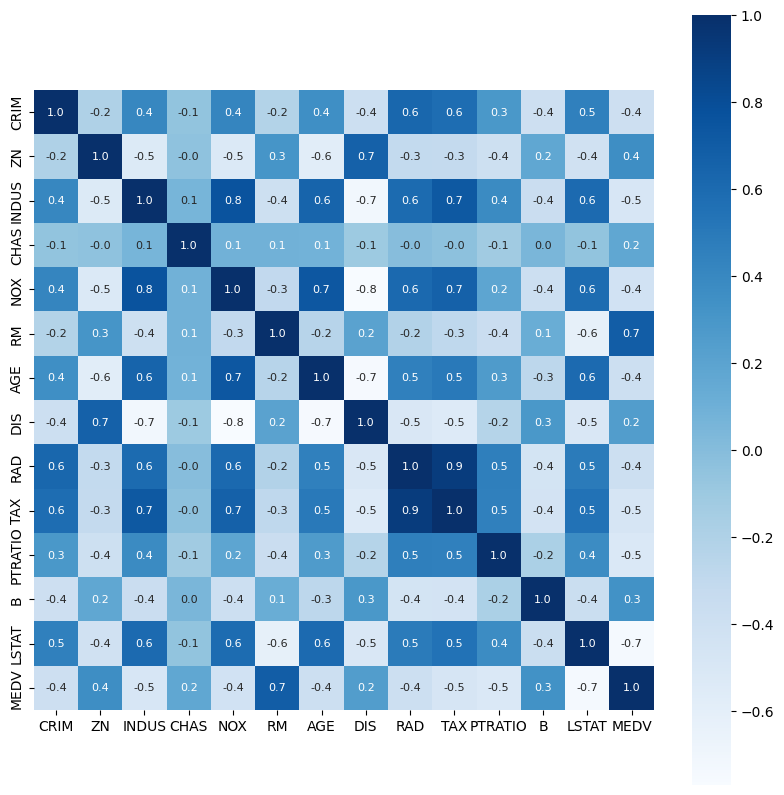

In [32]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

dataset

In [33]:
X = dataset.drop('MEDV',axis=1)
Y = dataset['MEDV']

In [34]:
Y

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=27)

In [36]:
print(X.shape, X_train.shape, X_test.shape)

(506, 13) (404, 13) (102, 13)


In [37]:
model = LinearRegression()

In [38]:
model.fit(X_train, Y_train)

LinearRegression()

In [39]:
model_prediction = model.predict(X_train)

In [40]:
model_prediction

array([41.8960321 , 22.25721753, 26.46256735, 15.89836563, 18.12993537,
        9.63561281, 18.48348013, 24.72527811, 15.98541305, 25.32216619,
       24.2785868 , 13.39301089, 26.56293463, 20.56414094, 23.07228668,
       37.68149994, 18.94833282, 16.80489812, 22.15006962, 21.4250977 ,
       22.86644084, 17.83807601, 22.05594824, 12.16505977, 25.627594  ,
        8.67072344, -4.47453727, 12.25560305, 28.36519516,  6.60898507,
       11.05632134, 28.73754081, 27.24945282, 18.47275587, 37.54344243,
       39.50191119, 22.8191784 , 23.57257248, 19.89992748, 35.41341207,
       12.69339192, 18.53006271,  9.55751954, 23.40397875, 30.7727188 ,
       22.91986447, 15.61087835, 18.34610695, 17.57139537, 15.20462192,
       22.42105981, 14.92573353, 16.23517271, 32.32404642, 19.84307398,
       24.5467632 , 22.56805212, 35.15125569, 16.96155963, 24.8353069 ,
       25.01651259, 28.24674385, 20.39260027, 27.39806252, 27.26386806,
       31.82133839, 16.27544174, 20.07432019, 19.37253913, 19.83

In [41]:
score1 = metrics.r2_score(model_prediction, Y_train)
print("R2 score = " , score1)

R2 score =  0.6614876294966052


In [42]:
score2 = metrics.mean_absolute_error(model_prediction, Y_train)
print("Mean Absolute Error = " , score2)

Mean Absolute Error =  3.2225181191763905


In [43]:
model2 = XGBRegressor()

In [44]:
model2.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [45]:
model_prediction2 = model2.predict(X_train)

In [46]:
score3 = metrics.r2_score(model_prediction2, Y_train)
print("R2 score = " , score3)

R2 score =  0.999995571963926


In [47]:
score4 = metrics.mean_absolute_error(model_prediction2, Y_train)
print("Mean Absolute Error = " , score4)

Mean Absolute Error =  0.013325518664747254


In [48]:
input = np.array([[0.04527,	0.0,	11.93,	0,	0.573,	6.120,	76.7,	2.2875,	1, 273,	21.0,	396.90,	9.08]])
model.predict(input)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([22.25721753])

In [50]:
input = np.array([[0.04527,	0.0,	11.93,	0,	0.573,	6.120,	76.7,	2.2875,	1, 273,	21.0,	396.90,	9.08]])
model2.predict(input)

array([20.578411], dtype=float32)